# master_neutrons INTERACTIVE visualisation

<br />

In [13]:
# custom analysis tools
from analysis.scan import scan
from analysis.tools import plot_it
from analysis.tools import get_diff
from analysis.tools import extract_species
from analysis.tools import muon_filter_by_parts

# useful python libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy.optimize import curve_fit
import pandas as pd

# system modules
from IPython import get_ipython
import os

# interactive widgets
import ipywidgets as widgets
from ipywidgets import interact

plt.rcParams['figure.figsize'] = 26, 10
plt.style.use('ggplot')

# Data Paths

In [2]:
STUDY = 'master_neutrons'

# Get the current directory where the Jupyter Notebook is located

current_directory = get_ipython().run_line_magic('pwd', '')

# Extract the local path to 3CS folder
local_path        = current_directory.split('repo_note3cs')[0]

# Define path to study within data3cs folder
path_to_study     = f'repo_data3cs/data3cs/studies/{STUDY}'

# Final path
path              = f'{local_path}{path_to_study}'

# Data Import and Scan Objects Instantiation

In [23]:
# References
ZnO                      = extract_species(path, 'ZnO')
ZnO_samples        = ['ZnO_B3_500', 'ZnO_B3_501', 'ZnO_B3_502']

#H2O                      = extract_species(path, 'H2O')
#H2O_samples       = ['h2o']

Qz_wl                    = extract_species(path, 'Qz_wl')
Qz_wl_samples     = ['qz_wl']


# Irradiation group
LiF_irrad                = extract_species(path, 'LiF', ext='irrad') 
LiF_irrad_samples = ['LiF_B1_131', 'LiF_B2_145', 'LiF_B2_157', 'LiF_B2_158']

BaF_irrad                = extract_species(path, 'BaF', ext='irrad') 
BaF_irrad_samples = ['BaF_B2_181','BaF_B2_183', 'BaF_B2_185', 'BaF_B2_192']

Qz_irrad                   = extract_species(path, 'Qz', ext='irrad') 
Qz_irrad_samples    = ['Qz_B2_063', 'Qz_B2_067', 'Qz_B2_069', 'Qz_B2_072']

SP_irrad                   = extract_species(path, 'SP', ext='irrad') 
SP_irrad_samples     = ['SP4500', 'SP4501', 'SP4502', 'SP4503']

# Control group
LiF_ctrl                     = extract_species(path, 'LiF', ext='ctrl') 
LiF_ctrl_samples      = ['LiF_B1_130', 'LiF_B2_143', 'LiF_B2_155']

BaF_ctrl                     = extract_species(path, 'BaF', ext='ctrl') 
BaF_ctrl_samples     = ['BaF_B2_182','BaF_B2_188', 'BaF_B2_193']

Qz_ctrl                        = extract_species(path, 'Qz', ext='ctrl') 
Qz_ctrl_samples         = ['Qz_B2_064', 'Qz_B2_064', 'Qz_B2_071']

SP_ctrl                        = extract_species(path, 'SP', ext='ctrl') 
SP_ctrl_samples         = ['SP4504']

# Define Functions

In [4]:
def grid_it():
    plt.grid(True, which='both', linestyle='-', linewidth=0.75, color='grey')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='grey', linestyle='--', linewidth=0.4) 

# interactivity functions: displays the group data using dropdown menus
def show_interactive(group, sample_options, A, B=None, it=0):
    
    dropdown       = widgets.Dropdown(
        options       = sample_options,
        description = 'Select sample: ',
    )
    
    @interact(selected_option = dropdown)
    def show_sigs(selected_option):
    
        sample = selected_option; t = '15.0'

        if B !=None:
        
            # A centre
        
            plt.figure(figsize=(28, 8))
            plt.subplot(1, 2, 1)  # 2 rows, 1 column, 1st subplot
            
            plot_it(group['coll1'][f'{sample}_A'], A, t, label = 'coll1', color='orange', it = it);
            plot_it(group['coll2'][f'{sample}_A'], A, t, label = 'coll2', color='red', it = it);
            plot_it(group['coll3'][f'{sample}_A'], A, t, label = 'coll3', color='peachpuff', it = it);
            plot_it(group['coll4'][f'{sample}_A'], A, t, label = 'coll4', color='y', it = it);
            plot_it(group['coll5'][f'{sample}_A'], A, t, label = 'coll5', color='cyan', it = it);
            plot_it(group['coll6'][f'{sample}_A'], A, t, label = 'coll6', color='fuchsia', it = it);
            plt.title(f'{sample} @ {A}nm', fontsize=25)
            grid_it()
            
            
            # B centre
            plt.subplot(1, 2, 2)  # 2 rows, 1 column, 1st subplot
            plot_it(group['coll1'][f'{sample}_B'], B, t, label = 'coll1', color='orange', it = it);
            plot_it(group['coll2'][f'{sample}_B'], B, t, label = 'coll2', color='red', it = it);
            plot_it(group['coll3'][f'{sample}_B'], B, t, label = 'coll3', color='peachpuff', it = it);
            plot_it(group['coll4'][f'{sample}_B'], B, t, label = 'coll4', color='y', it = it);
            plot_it(group['coll5'][f'{sample}_B'], B, t, label = 'coll5', color='cyan', it = it);
            plot_it(group['coll6'][f'{sample}_B'], B, t, label = 'coll6', color='fuchsia', it = it);
            plt.title(f'{sample} @ {B}nm', fontsize=25)
            grid_it()
        
            plt.tight_layout() 
            plt.show()

        elif (A != None) and (B == None):
            plt.figure(figsize=(18, 8))
            plot_it(group['coll1'][f'{sample}_A'], A, t, label = 'coll1', color='orange', it = it);
            plot_it(group['coll2'][f'{sample}_A'], A, t, label = 'coll2', color='red', it = it);
            plot_it(group['coll3'][f'{sample}_A'], A, t, label = 'coll3', color='peachpuff', it = it);
            plot_it(group['coll4'][f'{sample}_A'], A, t, label = 'coll4', color='y', it = it);
            plot_it(group['coll5'][f'{sample}_A'], A, t, label = 'coll5', color='cyan', it = it);
            plot_it(group['coll6'][f'{sample}_A'], A, t, label = 'coll6', color='fuchsia', it = it);
            plt.title(f'{sample} @ {A}nm', fontsize=25)
            grid_it()
        
        elif (A == None) and (B== None):
            plt.figure(figsize=(18, 8))
            plot_it(group['coll1'][f'{sample}'], '400', '0.5', label = 'coll1', color='orange', it = it);
            plot_it(group['coll2'][f'{sample}'], '400', '0.5', label = 'coll2', color='red', it = it);
            plot_it(group['coll3'][f'{sample}'], '400', '0.5', label = 'coll3', color='peachpuff', it = it);
            plot_it(group['coll4'][f'{sample}'], '400', '0.5', label = 'coll4', color='y', it = it);
            plot_it(group['coll5'][f'{sample}'], '400', '0.5', label = 'coll5', color='cyan', it = it);
            plot_it(group['coll6'][f'{sample}'], '400', '0.5', label = 'coll6', color='fuchsia', it = it);
            plt.title(f'{sample}', fontsize=25)
            grid_it()
        
        return None

def moving_average(x_array, y_array, window):

    new_x      = []
    avr_array = []
    for i in range(window, len(y_array) - window):

        new_x.append(x_array[i])
        
        val = 0
        for j in range(1, window):
            right = y_array[i+j]
            left=y_array[i-j]

            if right != np.nan:
                val+= right
            if left != np.nan:
                val+= left
        if y_array[i] != np.nan:
            val+=y_array[i]
        avr_array.append(val/(window*2 +1))
    
    return new_x, avr_array

---

# ZnO

In [14]:
show_interactive(ZnO, ZnO_samples, A=None)

interactive(children=(Dropdown(description='Select sample: ', options=('ZnO_B3_500', 'ZnO_B3_501', 'ZnO_B3_502…

---

# Lithium Fluoride

In [5]:
# irradiation group
show_interactive(LiF_irrad, LiF_irrad_samples, '260', B='435')

interactive(children=(Dropdown(description='Select sample: ', options=('LiF_B1_131', 'LiF_B2_145', 'LiF_B2_157…

In [6]:
# control group
show_interactive(LiF_ctrl, LiF_ctrl_samples, '260', B='435')

interactive(children=(Dropdown(description='Select sample: ', options=('LiF_B1_130', 'LiF_B2_143', 'LiF_B2_155…

---

#  Barium Fluoride

In [7]:
# irradiation group
show_interactive(BaF_irrad, BaF_irrad_samples, '250', B='320')

interactive(children=(Dropdown(description='Select sample: ', options=('BaF_B2_181', 'BaF_B2_183', 'BaF_B2_185…

In [8]:
# ctrl group
show_interactive(BaF_ctrl, BaF_ctrl_samples, '250', B='320')

interactive(children=(Dropdown(description='Select sample: ', options=('BaF_B2_182', 'BaF_B2_188', 'BaF_B2_193…

---

# Quartz

In [9]:
# irradiation group
show_interactive(Qz_irrad, Qz_irrad_samples, '250')

interactive(children=(Dropdown(description='Select sample: ', options=('Qz_B2_063', 'Qz_B2_067', 'Qz_B2_069', …

In [10]:
# control group
show_interactive(Qz_ctrl, Qz_ctrl_samples, '250')

interactive(children=(Dropdown(description='Select sample: ', options=('Qz_B2_064', 'Qz_B2_064', 'Qz_B2_071'),…

---

# Sapphire

In [11]:
# irradiation group
show_interactive(SP_irrad, SP_irrad_samples, '250')

interactive(children=(Dropdown(description='Select sample: ', options=('SP4500', 'SP4501', 'SP4502', 'SP4503')…

In [12]:
# control group
show_interactive(SP_ctrl, SP_ctrl_samples, '250')

interactive(children=(Dropdown(description='Select sample: ', options=('SP4504',), value='SP4504'), Output()),…

## Moving Average Rep

In [11]:
def remove_nans(x,y):
    size = len(y)
    indexes = []
    for i in range(size):
        if np.isnan(y[i]):
            indexes.append(i)

    x_clean = np.delete(x, indexes)
    y_clean = np.delete(y, indexes)

    print(len(indexes))
    
    return x_clean, y_clean

(280.0, 600.0)

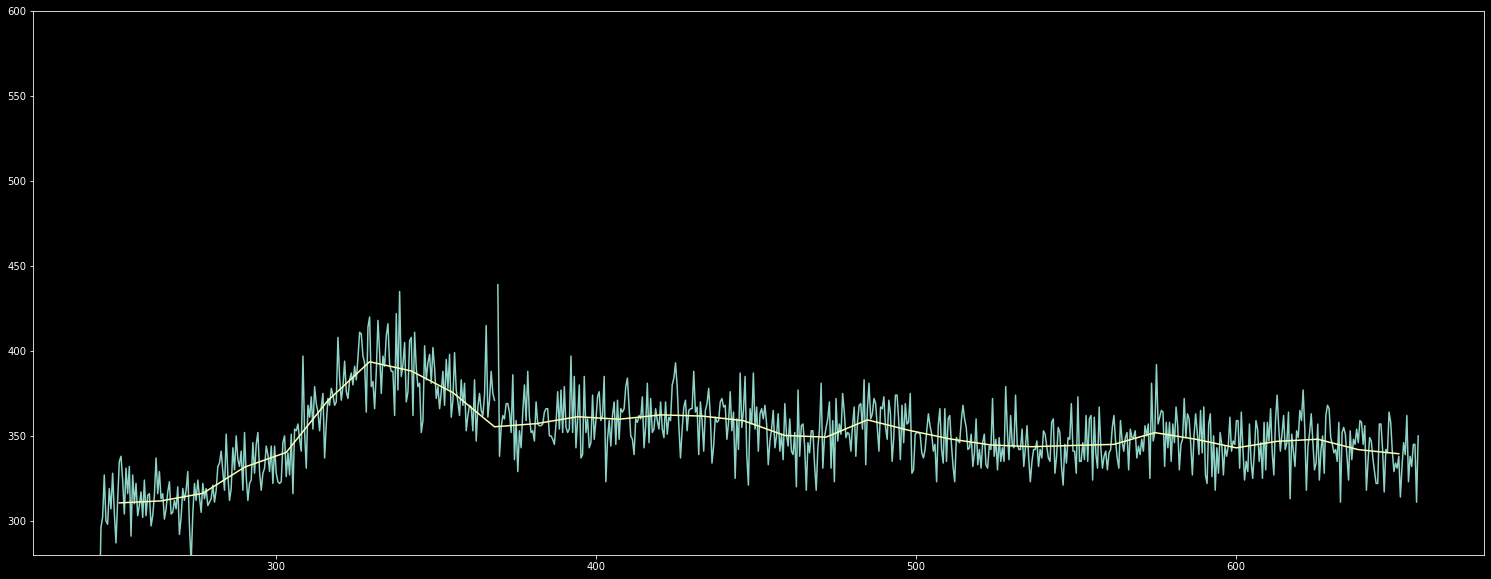

In [26]:
sp_1 = SP_irrad['coll1']['SP4500_A'].df.loc[('250', '0', '15.0sec', 'sp_0')]
x = np.array(sp_1['em_wl']) ; y = np.array(sp_1['count'])

y = muon_filter_by_parts(y)
x_b, y_b = rebin_data(x,y, bin_size=25)

plt.plot(x,y)
plt.plot(x_b, y_b)
plt.ylim(280, 600)

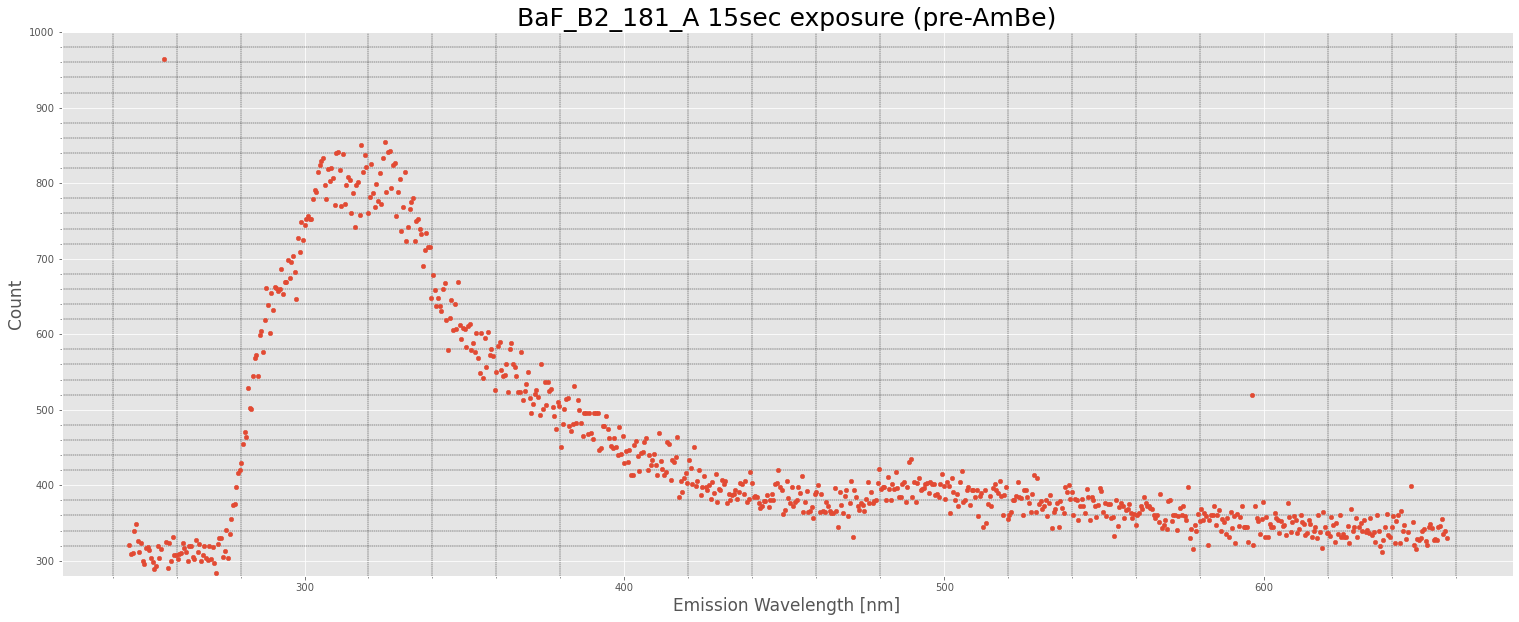

In [41]:
data = BaF_irrad['coll1']['BaF_B2_181_A']
df = data.df
x = df.loc[('250', '0', '15.0sec', 'sp_0')]['em_wl']
y = df.loc[('250', '0', '15.0sec', 'sp_0')]['count']

plt.scatter(x,y, s = 20)
plt.xlabel('Emission Wavelength [nm]', fontsize = 17)
plt.ylabel(r'Count', fontsize = 17)
plt.grid(visible=True, which='minor', color='black', linestyle='--', linewidth=0.4) 
plt.minorticks_on()
plt.ylim(280, 1000)
plt.title('BaF_B2_181_A 15sec exposure (pre-AmBe)', fontsize = 25);

In [29]:
data

{'Qz_B2_069_A': <analysis.scan.scan at 0x7fbbaaf2d120>,
 'Qz_B2_063_A': <analysis.scan.scan at 0x7fbbaaf2cb80>,
 'Qz_B2_072_A': <analysis.scan.scan at 0x7fbbaaf2c7f0>,
 'Qz_B2_067_A': <analysis.scan.scan at 0x7fbbaaf2c670>}

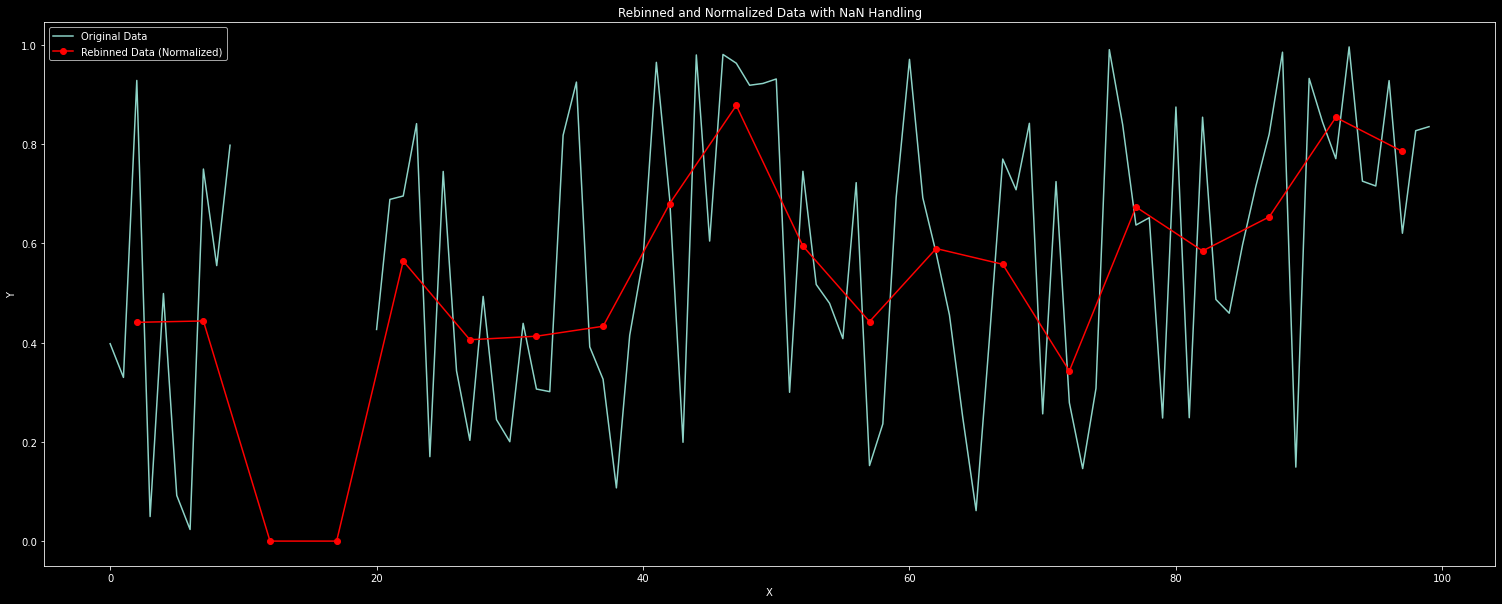

In [23]:

def rebin_data(x, y, bin_size):
    """
    Rebin data by grouping x and y values into larger bins and normalizing.

    Parameters:
    - x: 1D array of x values.
    - y: 1D array of y values.
    - bin_size: Size of the new bins.

    Returns:
    - rebinned_x: 1D array of rebinned x values.
    - rebinned_y: 1D array of rebinned y values (normalized).
    """
    # Calculate the number of bins
    num_bins = len(x) // bin_size

    # Trim x and y to ensure a whole number of bins
    trimmed_x = x[:num_bins * bin_size]
    trimmed_y = y[:num_bins * bin_size]

    # Reshape and sum values within each bin, handling NaN values
    rebinned_x = np.mean(trimmed_x.reshape((num_bins, bin_size)), axis=1)
    rebinned_y_sum = np.nansum(trimmed_y.reshape((num_bins, bin_size)), axis=1)

    # Normalize by dividing by bin size
    rebinned_y = rebinned_y_sum / bin_size

    return rebinned_x, rebinned_y

# Example usage:
# Generate sample data with NaN values
x = np.arange(0, 100, 1)
y = np.random.rand(len(x))
y[10:20] = np.nan  # Introducing NaN values

# Rebin the data with a bin size of 5 and normalize
rebinned_x, rebinned_y = rebin_data(x, y, bin_size=5)

# Plot the original and rebinned data
import matplotlib.pyplot as plt
plt.plot(x, y, label='Original Data')
plt.plot(rebinned_x, rebinned_y, label='Rebinned Data (Normalized)', marker='o', linestyle='-', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Rebinned and Normalized Data with NaN Handling')
plt.show()

In [32]:
LiF_irrad

{'coll1': {'LiF_B2_157_B': <analysis.scan.scan at 0x7fbbab2b3ac0>,
  'LiF_B2_158_B': <analysis.scan.scan at 0x7fbbaaec10c0>,
  'LiF_B1_131_B': <analysis.scan.scan at 0x7fbbaaec1360>,
  'LiF_B2_158_A': <analysis.scan.scan at 0x7fbbaa9b8460>,
  'LiF_B2_145_A': <analysis.scan.scan at 0x7fbbaaec1210>,
  'LiF_B2_145_B': <analysis.scan.scan at 0x7fbbab141150>,
  'LiF_B1_131_A': <analysis.scan.scan at 0x7fbbab207310>,
  'LiF_B2_157_A': <analysis.scan.scan at 0x7fbbab2f7940>},
 'coll2': {'LiF_B2_157_B': <analysis.scan.scan at 0x7fbbab23ecb0>,
  'LiF_B2_158_B': <analysis.scan.scan at 0x7fbbab143dc0>,
  'LiF_B1_131_B': <analysis.scan.scan at 0x7fbba25f5270>,
  'LiF_B2_158_A': <analysis.scan.scan at 0x7fbba25f4760>,
  'LiF_B2_145_A': <analysis.scan.scan at 0x7fbba25f6740>,
  'LiF_B2_145_B': <analysis.scan.scan at 0x7fbba2746c80>,
  'LiF_B1_131_A': <analysis.scan.scan at 0x7fbba27449d0>,
  'LiF_B2_157_A': <analysis.scan.scan at 0x7fbba27472b0>},
 'coll3': {'LiF_B2_157_B': <analysis.scan.scan at 0x